In [4]:
import numpy as np
import matplotlib.pyplot as plt 

[[40 21 11]
 [43 10 33]
 [43 37  0]]


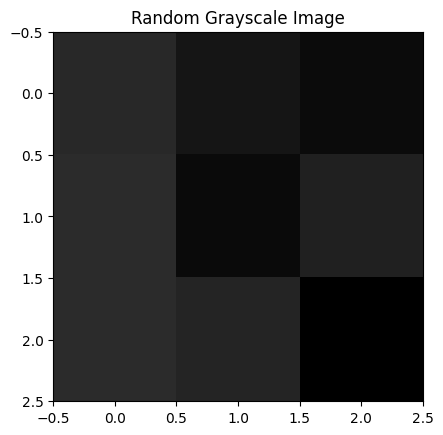

In [5]:
# Dimensions of the image
image_height = 3
image_width = 3

# Generate a random grayscale image
random_image = np.random.randint(0, 50, size=(image_height, image_width), dtype=np.uint8)
print(random_image)

# Display the random image using matplotlib
plt.imshow(random_image, cmap='gray', vmin=0, vmax=255)
plt.title('Random Grayscale Image')
plt.show()

In [6]:
numOfPixels = random_image.size
print(f"num of pixels: {numOfPixels}")

num of pixels: 9


In [7]:
noiseAmount = int(numOfPixels * 0.5)
print(f"noise amount: {noiseAmount}")

noise amount: 4


In [8]:
numOfSaltPixel = int(numOfPixels * 0.20)
print(f"salt: {numOfSaltPixel}")

salt: 1


In [9]:
numOfPepperPixel = int(numOfPixels * 0.30)
print(f"salt: {numOfPepperPixel}")

salt: 2


In [10]:
xCor, yCor = np.random.randint(0, (random_image.shape[0], random_image.shape[1]))
print(f"Cordinate: {xCor, yCor}")

Cordinate: (2, 0)


In [11]:
print(random_image.shape)

(3, 3)


In [12]:
def apply_average_filter(image, kernel_size):
    """Applies an average filter to an image."""

    pad_size = kernel_size // 2
    print(f"pad: {pad_size}")
    padded_image = np.pad(image, (pad_size, pad_size), mode='constant')
    print(f"padded imagae: {padded_image}")
    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            kernel_region = padded_image[i:i+kernel_size, j:j+kernel_size]
            print(f"karnel region: {kernel_region}")
            average = np.mean(kernel_region)
            print(f"average: {average}")
            filtered_image[i, j] = average

    return filtered_image

In [13]:
filtered_image = apply_average_filter(random_image, 2)
print(f"filtered_image: {filtered_image}")
print(f"original image: {random_image}")

pad: 1
padded imagae: [[ 0  0  0  0  0]
 [ 0 40 21 11  0]
 [ 0 43 10 33  0]
 [ 0 43 37  0  0]
 [ 0  0  0  0  0]]
karnel region: [[ 0  0]
 [ 0 40]]
average: 10.0
karnel region: [[ 0  0]
 [40 21]]
average: 15.25
karnel region: [[ 0  0]
 [21 11]]
average: 8.0
karnel region: [[ 0 40]
 [ 0 43]]
average: 20.75
karnel region: [[40 21]
 [43 10]]
average: 28.5
karnel region: [[21 11]
 [10 33]]
average: 18.75
karnel region: [[ 0 43]
 [ 0 43]]
average: 21.5
karnel region: [[43 10]
 [43 37]]
average: 33.25
karnel region: [[10 33]
 [37  0]]
average: 20.0
filtered_image: [[10 15  8]
 [20 28 18]
 [21 33 20]]
original image: [[40 21 11]
 [43 10 33]
 [43 37  0]]


In [28]:
image = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
], dtype=np.uint8)

In [66]:
def hermonicMean(image, kernelSize = 2):
    filteredImage  = np.zeros_like(image)
    padSize = kernelSize // 2
    paddedImage = np.pad(image, (padSize, padSize), mode='constant')
    print(f"padded image {paddedImage}")

    for i in range (padSize, image.shape[0] + padSize):
        for j in range(padSize, image.shape[1] + padSize):
            window = paddedImage[i - padSize: i+padSize+1, j - padSize: j+padSize+1]

            print(f"window: {window}")

            pixel = 0

            for r in range(window.shape[0]):
                for k in range(window.shape[1]):
                    pixel += 0 if np.isinf(1/window[r, k]) else 1/window[r, k]

            pixel = 0 if pixel == 0 else (kernelSize ** 2 / pixel)

            if pixel > 255:
                pixel = 255

            filteredImage[i-padSize, j-padSize]= pixel
    return filteredImage
print(f"hermonicMean: {hermonicMean(image)}")

padded image [[0 0 0 0 0]
 [0 1 2 3 0]
 [0 4 5 6 0]
 [0 7 8 9 0]
 [0 0 0 0 0]]
window: [[0 0 0]
 [0 1 2]
 [0 4 5]]
window: [[0 0 0]
 [1 2 3]
 [4 5 6]]
window: [[0 0 0]
 [2 3 0]
 [5 6 0]]
window: [[0 1 2]
 [0 4 5]
 [0 7 8]]
window: [[1 2 3]
 [4 5 6]
 [7 8 9]]
window: [[2 3 0]
 [5 6 0]
 [8 9 0]]
window: [[0 4 5]
 [0 7 8]
 [0 0 0]]
window: [[4 5 6]
 [7 8 9]
 [0 0 0]]
window: [[5 6 0]
 [8 9 0]
 [0 0 0]]
hermonicMean: [[2 1 3]
 [1 1 2]
 [5 4 6]]


C:\Users\Fahim Ahammed Firoz\AppData\Local\Temp\ipykernel_6708\1882059399.py:17: RuntimeWarning: divide by zero encountered in divide
  pixel += 0 if np.isinf(1/window[r, k]) else 1/window[r, k]


In [27]:
def apply_harmonic_mean_filter2(image, mask_size):
    filtered_image = image.copy()
    height, width = filtered_image.shape 
    offset, number_of_pixel = mask_size // 2, mask_size * mask_size

    for r in range(height):
        for c in range(width):
            pixel = 0
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        pixel += float(1 / (image[r + x, c + y] + 1e-4))
            pixel = number_of_pixel / pixel
            filtered_image[r, c] = 255 if pixel > 255 else pixel

    return np.uint8(filtered_image)

harmonic_filtered = apply_harmonic_mean_filter2(image, 3)  # Adjust filter_size as needed
print(f"hermonicMean: {harmonic_filtered}")

hermonicMean: [[172 108 216]
 [100  70 123]
 [117  96 187]]


In [75]:
def geoMetricMean(image, kernelSize = 2):
    filteredImage  = np.zeros_like(image)
    padSize = kernelSize // 2
    paddedImage = np.pad(image, (padSize, padSize), mode='constant')

    for i in range (padSize, image.shape[0] + padSize):
        for j in range(padSize, image.shape[1] + padSize):
            window = paddedImage[i - padSize: i+padSize+1, j - padSize: j+padSize+1]

            pixel = 1
            # Calculate the product of pixel values in the window
            for r in range(window.shape[0]):
                for k in range(window.shape[1]):
                    pixel = pixel * int(window[r, k])

            pixel = pixel ** (1/(kernelSize ** 2)) # Take the geometric mean by raising the product to the power of (1 / (kernelSize^2))

            if pixel > 255:
                pixel = 255

            filteredImage[i-padSize, j-padSize]= pixel
    return filteredImage
print(f"hermonicMean: {geoMetricMean(image)}")

hermonicMean: [[ 2  5  3]
 [ 6 24 10]
 [ 5 15  6]]


In [2]:
import cv2

# Load the image
image = cv2.imread("./photos/Rose-1024x1024.tif")

# Get the current number of bits per pixel
bpp = image.dtype.itemsize * 8

# Calculate the new number of bits per pixel
new_bpp = bpp - 1

# Check if the new bpp is binary (1 bit)
if new_bpp == 1:
    # Convert the image to binary using thresholding
    threshold, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
else:
    # Reduce the intensity levels by one bit
    mask = 2 ** (bpp - new_bpp) - 1
    image = cv2.bitwise_and(image, mask)

# Display the original and modified images side-by-side
original_half = cv2.resize(image, (image.shape[1] // 2, image.shape[0] // 2))
modified_half = cv2.resize(binary_image if new_bpp == 1 else image, (image.shape[1] // 2, image.shape[0] // 2))
combined_image = cv2.hstack([original_half, modified_half])

# Show the combined image
cv2.imshow("Original vs. Modified", combined_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


AttributeError: module 'cv2' has no attribute 'hstack'